In [1]:
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import matplotlib.pyplot as plt 
import community as community_louvain
import matplotlib.cm as cm

G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype=int)
print(nx.info(G_fb))


pos = nx.spring_layout(G_fb)
betCent = nx.degree_centrality(G_fb)

degree_pos = nx.spring_layout(G_fb)
degree_centrality = nx.degree_centrality(G_fb)

load_pos = nx.spring_layout(G_fb)
load_centrality = nx.load_centrality(G_fb,normalized=True)

eigenpos = nx.spring_layout(G_fb)
eigencent = nx.eigenvector_centrality(G_fb)

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [35]:
def set_node_community(G, communities):
        '''Add community to node attributes'''
        for c, v_c in enumerate(communities):
            for v in v_c:
                G.nodes[v]['community'] = c + 1

def set_edge_community(G):
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            G.edges[v, w]['community'] = 0

In [20]:
#show the density of the graph
density = nx.density(G_fb)
print("Network density:", density)

Network density: 0.010819963503439287


In [21]:
G_fb.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [26]:
# check if the graph is a connected graph or not, and show the diameter of the graph
print('Whether this graph is a connected graph or notL',nx.is_connected(G_fb))
diameter = nx.diameter(G_fb)
print("Network diameter of largest component:", diameter)

Whether this graph is a connected graph or notL True
Network diameter of largest component: 8


In [24]:
#show the biggest connected component of the graph(itself)
components = nx.connected_components(G_fb)
largest_component = max(components, key=len)
print(components)
print(largest_component)

<generator object connected_components at 0x7f86426baf50>
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 2

In [28]:
# The ranked order of nodes in terms of node betweenness centrality
print('The node importance ranking generated by betweenness centrality is:',sorted(betCent, key=betCent.get, reverse=True)[:10])
sorted_dict = sorted(betCent.items(), key=lambda pair: pair[1], reverse=True )[:10]
for ele in sorted_dict:
    print(ele,'\n')

The node importance ranking generated by betweenness centrality is: [107, 1684, 1912, 3437, 0, 2543, 2347, 1888, 1800, 1663]
(107, 0.258791480931154) 

(1684, 0.1961367013372957) 

(1912, 0.18697374938088163) 

(3437, 0.13546310054482416) 

(0, 0.08593363051015354) 

(2543, 0.07280832095096582) 

(2347, 0.07206537890044576) 

(1888, 0.0629024269440317) 

(1800, 0.06067360079247152) 

(1663, 0.058197127290737984) 



In [29]:
# The ranked order of nodes in terms of node degree centrality
print('The node importance ranking generated by degree centrality is:',sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:10])
sorted_dict = sorted(degree_centrality.items(), key=lambda pair: pair[1], reverse=True )[:10]
for ele in sorted_dict:
    print(ele,'\n')

The node importance ranking generated by degree centrality is: [107, 1684, 1912, 3437, 0, 2543, 2347, 1888, 1800, 1663]
(107, 0.258791480931154) 

(1684, 0.1961367013372957) 

(1912, 0.18697374938088163) 

(3437, 0.13546310054482416) 

(0, 0.08593363051015354) 

(2543, 0.07280832095096582) 

(2347, 0.07206537890044576) 

(1888, 0.0629024269440317) 

(1800, 0.06067360079247152) 

(1663, 0.058197127290737984) 



In [27]:
# The ranked order of nodes in terms of node load centrality
print('The node importance ranking generated by load centrality is:',sorted(load_centrality, key=load_centrality.get, reverse=True)[:10])
sorted_dict = sorted(load_centrality.items(), key=lambda pair: pair[1], reverse=True )[:10]
for ele in sorted_dict:
    print(ele,'\n')
    

The node importance ranking generated by load centrality is: [107, 1684, 3437, 1912, 0, 1085, 698, 567, 58, 428]
(107, 0.4714778790182446) 

(1684, 0.34087350619180956) 

(3437, 0.23460775723359747) 

(1912, 0.23046886766231683) 

(0, 0.14589269968462806) 

(1085, 0.1451750604998699) 

(698, 0.1176288875712453) 

(567, 0.09484964910357949) 

(58, 0.08953881427698453) 

(428, 0.06467509190781706) 



In [38]:
# The ranked order of nodes in terms of node eigenvalue centrality
print('The node importance ranking generated by eginvalue centrality is:',sorted(eigencent, key=eigencent.get, reverse=True)[:10])
sorted_dict = sorted(eigencent.items(), key=lambda pair: pair[1], reverse=True )[:10]
for ele in sorted_dict:
    print(ele,'\n')

The node importance ranking generated by eginvalue centrality is: [1912, 2266, 2206, 2233, 2464, 2142, 2218, 2078, 2123, 1993]
(1912, 0.09540696149067629) 

(2266, 0.08698327767886553) 

(2206, 0.08605239270584343) 

(2233, 0.08517340912756598) 

(2464, 0.08427877475676092) 

(2142, 0.08419311897991796) 

(2218, 0.08415573568055032) 

(2078, 0.08413617041724979) 

(2123, 0.08367141238206226) 

(1993, 0.0835324284081597) 



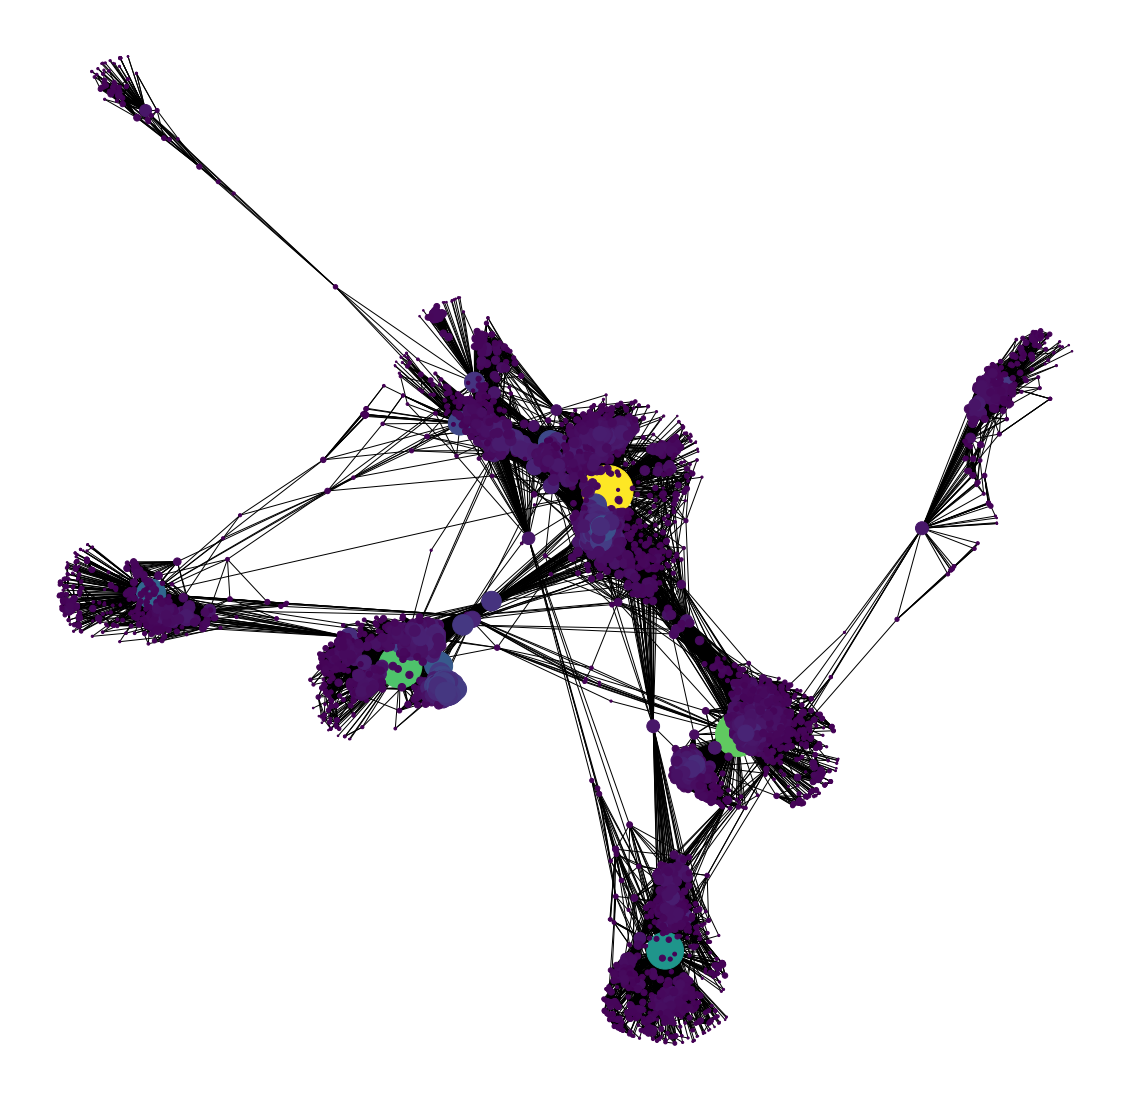

node betweenness centrality plot


In [33]:
#plot the node importance of the nodes in terms of betweeness centrality
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))

nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
plt.show()
print('node betweenness centrality plot')

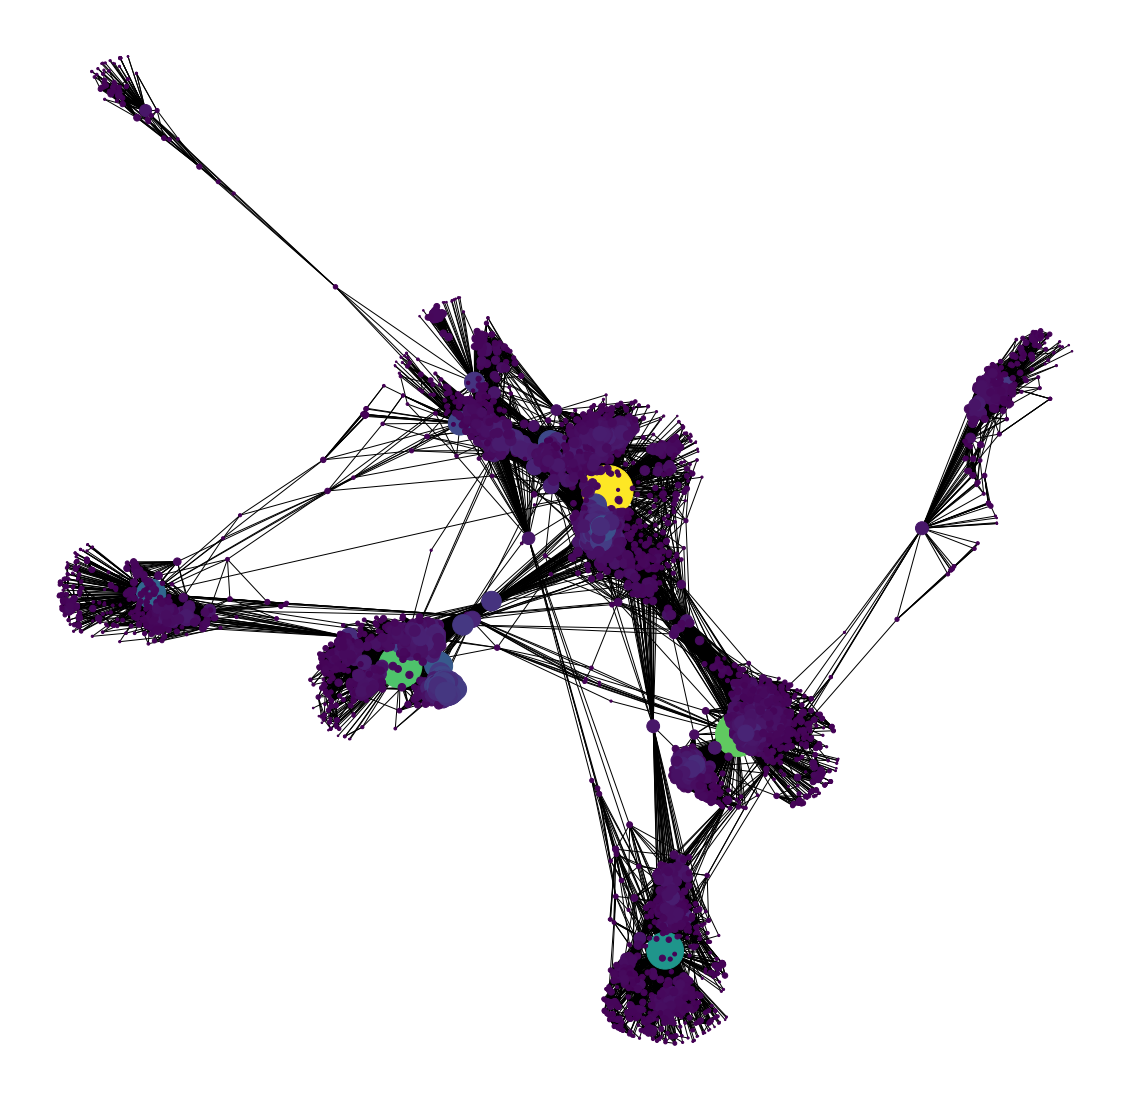

Degree centrality plot


In [34]:
#plot the node importance of the nodes in terms of degree centrality
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))

nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
plt.show()
print('Degree centrality plot')

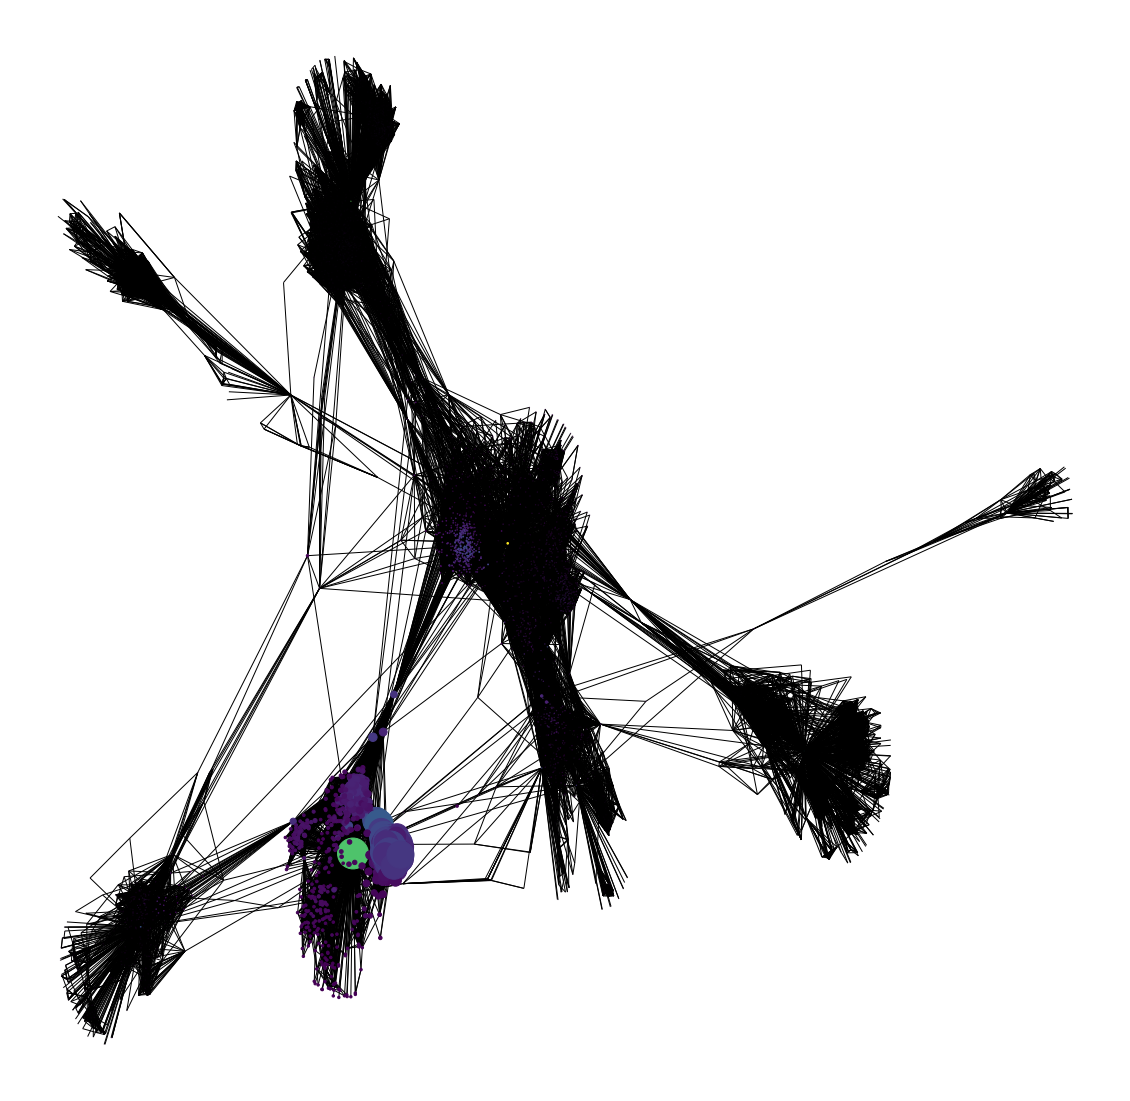

eigenvalue centrality plot


In [37]:
eigencent = nx.eigenvector_centrality(G_fb)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in eigencent.values()]
plt.figure(figsize=(20,20))

nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
plt.show()
print('eigenvalue centrality plot')

In [18]:
# show the community detection of the graph
partition = community_louvain.best_partition(G_fb)

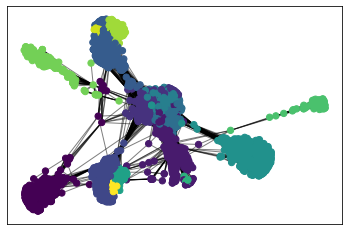

<Figure size 432x288 with 0 Axes>

In [36]:
#plot the result of the community detection and color each community with different colors
pos = nx.spring_layout(G_fb)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G_fb, pos, partition.keys(), node_size=40, 
                        cmap=cmap, node_color=list(partition.values()))

nx.draw_networkx_edges(G_fb, pos, alpha=0.5)
plt.show()
plt.savefig('community_detection.png')